Kernel: linear
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.70      0.78      0.74         9
           2       0.83      0.91      0.87        11

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.85      0.83      0.84        30

[[ 8  2  0]
 [ 0  7  2]
 [ 0  1 10]]


Kernel: poly
Accuracy: 0.6333333333333333
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.45      1.00      0.62         9
           2       1.00      0.27      0.43        11

    accuracy                           0.63        30
   macro avg       0.82      0.66      0.62        30
weighted avg       0.84      0.63      0.62        30

[[7 3 0]
 [0 9 0]
 [0 8 3]]


Kernel: rbf
Accuracy: 0.8
              precision    recall  f1-score   support

  

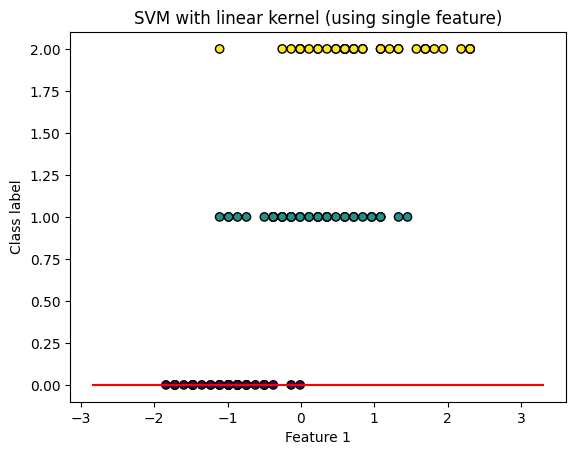

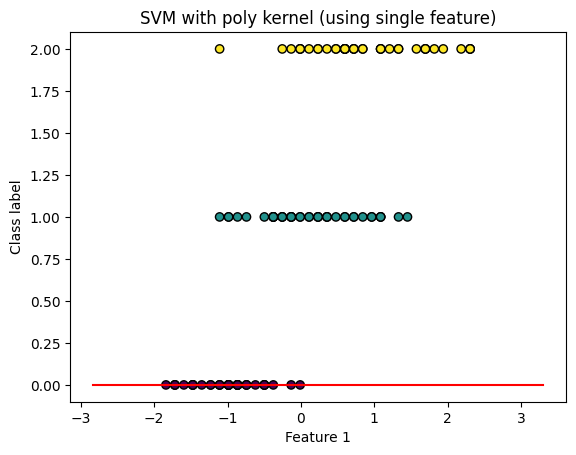

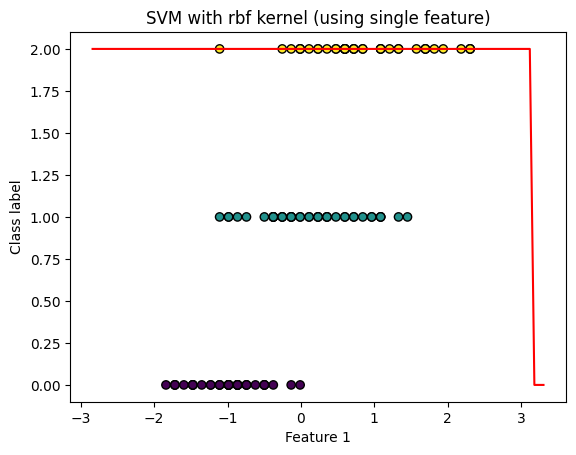

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Use only the first feature for 1D case
X = X[:, :1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model with different kernels
kernels = ['linear', 'poly', 'rbf']
results = []
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = svm_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results.append((kernel, accuracy))

    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*60 + "\n")

# Compare results
print("Comparison of classification accuracy for different kernels:")
for kernel, accuracy in results:
    print(f"Kernel: {kernel}, Accuracy: {accuracy}")

# Plotting decision boundaries (for 1D feature space)
# We need to adjust the plotting for 1D space
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)

    plt.figure()
    X0 = np.linspace(X_train.min() - 1, X_train.max() + 1, 100).reshape(-1, 1)
    Z = svm_model.predict(scaler.transform(X0))
    plt.plot(X0, Z, 'r-')
    plt.scatter(X_train, y_train, c=y_train, edgecolors='k', marker='o')
    plt.title(f'SVM with {kernel} kernel (using single feature)')
    plt.xlabel('Feature 1')
    plt.ylabel('Class label')
    plt.show()
